# COSC 311 Mid-exam 2

To finish this exam, please download the "housing.csv" dataset from the exam instructions. You will have 80 minutes to finish.

This is a open-book exam. You may use the lecture note, textbook, and online tutorials. However, you are NOT allowed to search any related example code and/or solution from any internet sources.

Note: you need to copy and paste your source code in the Answer Area after each task on MyClasses. In addition, you also need to upload this Jupyter Notebook (".ipynb") file with all source code and test results to the last task of this exam on MyClasses.

I. Please use the "Housing Dataset" attached to finish the following tasks. For each task, please copy and paste your source code in the Answer Area after each task. At the same time, please upload your Jupyter Notebook (".ipynb") file with all source code and test results at the last task of this exam.

1. (20 points) Use Pandas package to:

1) use info() function to show the column information of this dataset

2) use describe() function to show the statistics (count, mean, std, min, ...) of this dataset

3) show the unique values of the "ocean_proximity" column

4) count how many samples there are in this dataset

In [4]:
import pandas as pd

# Read in the data
Housing = pd.read_csv('housing.csv')

# Print out the infomation for each dataset using info()
print("Housing Data column information:")
print(Housing.info())

print("Housing Data column statistics information:")
print(Housing.describe())

Housing_Ocean = Housing['ocean_proximity'].unique()
print("Housing Data 'ocean prox' unique value information:")
print(Housing_Ocean)

Housing_samples = len(Housing)
print('There are', Housing_samples, 'samples in Housing dataset.')


Housing Data column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
Housing Data column statistics information:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.

2. (15 points) Draw a scatterplot figure to show the relationship between "median_income" and "median_house_value"

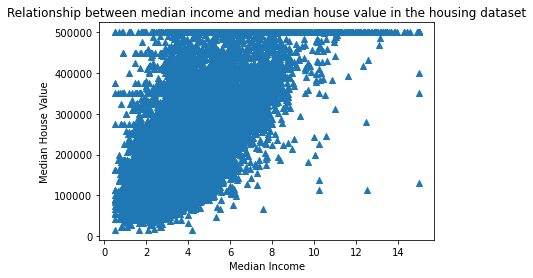

In [6]:
import numpy as np
from matplotlib import pyplot as plt

plt.scatter(Housing['median_income'], Housing['median_house_value'], marker='^')
plt.title('Relationship between median income and median house value in the housing dataset')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show();


3. (15 points) Draw a bar figure to show the average "population" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

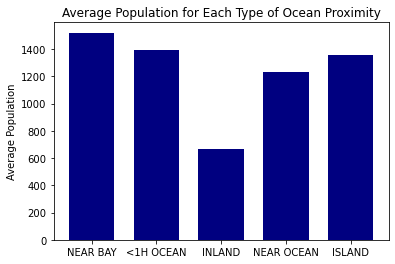

In [21]:
Ocean_Prox = Housing.groupby('ocean_proximity')['population'].mean()

plt.bar(range(len(Ocean_Prox)), Ocean_Prox, width = 0.7, align='center', color = 'Navy')

plt.title("Average Population for Each Type of Ocean Proximity")
plt.ylabel("Average Population")
Xlabels = ["NEAR BAY", "<1H OCEAN", "INLAND", "NEAR OCEAN","ISLAND"]
plt.xticks(range(len(Ocean_Prox)), Xlabels)
plt.show();


4. (15 points) Draw a histogram to show the "median_income" distribution in 5 bins for the "NEAR BAY" houses

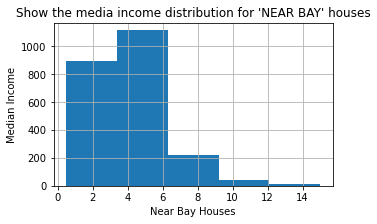

In [67]:
Housing['median_income'][Housing['ocean_proximity'] == 'NEAR BAY'].hist(bins = 5, grid = True, figsize = (5,3))
plt.title("Show the media income distribution for 'NEAR BAY' houses")
plt.ylabel("Median Income")  
plt.xlabel("Near Bay Houses")
plt.show();

II. Please use the "breast cancer dataset" included in the scikit-learn library to conduct the following classfication tasks. The code for loading this dataset is given below:

*from sklearn import datasets*

*dataset = datasets.load_breast_cancer()*

*X = dataset['data']*

*y = dataset['target']*


For each task, please copy and paste your source code in the Answer Area after each task. At the same time, please upload your Jupyter Notebook (".ipynb") file with all source code and test results at the last task of this exam.

1. (5 points) Randomly split this dataset into two parts: 60% for training and 40% for testing
2. (20 points) Build a Decision Tree classification model with appropriate parameters (to obtain higher testing accuracy). Show the testing accuracy using ".score()" method
3. (10 points) Show the confusion matrix of the above independent test

In [51]:
%matplotlib inline
from sklearn import datasets
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = datasets.load_breast_cancer()

X = dataset['data']
y = dataset['target']

# STEP 1- Randomly split this dataset into two parts: 60% for training and 40% for testing

# 40% used for testing and 60% is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 42)

# Train DT model
dt = DecisionTreeClassifier(max_depth=13)
dt.fit(X_train, y_train)

# Test DT model
y_pred_dt = dt.predict(X_test)

# Print classification report
print("DT Classification Report TASK 1:\n", classification_report(y_test, y_pred_dt))

# The testing accuracy is .92 when we use train the dataset

DT Classification Report TASK 1:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        80
           1       0.96      0.91      0.93       148

    accuracy                           0.92       228
   macro avg       0.90      0.92      0.91       228
weighted avg       0.92      0.92      0.92       228



The testing accuracy is equal to:  0.9342105263157895
[[ 75   5]
 [ 10 138]]


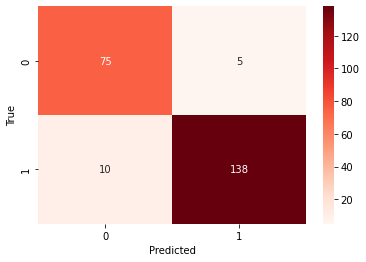

In [65]:
# STEP 2- Build a Decision Tree classification model with appropriate parameters (to obtain higher testing accuracy). 
# Show the testing accuracy using ".score()" method

# Create DT model with optimal parameters
dt = DecisionTreeClassifier(criterion='gini', max_depth=33)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict labels for the test data
y_pred = dt.predict(X_test)

score = dt.score(X_test, y_test) # attribute value, and value
print("The testing accuracy is equal to: ", score)

# STEP 3- Show the confusion matrix of the above independent test

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# The testing accuracy is = .94 when we use the appropriate parameters which is .2 highers then the original